In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC

In [6]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, RandomUnderSampler
from imblearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore")

In [8]:
df1 = pd.read_csv ("/Users/sravyajonnalagadda/Downloads/creditcard.csv")
df = df1.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis (EDA)

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## The target variable, the 'Class' column, contains fraudulent transactions (1) and non-fraudulent transactions (0). 
Looking at the table, we can see that the average value of this column is 0.0017, which indicates that the proportion of fraudulent transactions in the dataset is quite low, and the data is imbalanced. This highlights the need to pay attention to class imbalance issues during the model-building phase.

In the 'Amount' column, the minimum transaction amount is 0, and the maximum amount is 25,691. The wide range of transaction amounts and the high standard deviation (250.12) suggest that there are significant differences between the transactions. Upon examining the distribution of this column, we can conclude that feature scaling will be necessary in later stages. This step is crucial for improving model performance and obtaining more consistent results.

The 'Time' column represents the time elapsed in seconds since the transaction took place. The minimum value is 0, and the maximum value is 172,792, confirming that the dataset was collected over a period of two days. The standard deviation of this column is 47,488, indicating a wide distribution of transactions over time.

In [18]:
df.shape

(284807, 31)

## The dataset contains a total of 284,807 rows and 31 columns. 
When we look at the first 5 rows, we can see that most of the columns consist of numerical values. 
The 'Class' column represents the target variable, indicating whether the transaction is fraudulent (1) or normal (0). The other columns have been transformed using Principal Component Analysis (PCA) to maintain data privacy, and as a result, they have been converted into numerical values.

In [21]:
df.isna().sum().sum()

0

## There are no missing (null) values in our dataset, which indicates that we are working with a clean dataset for our analysis. This means there is no need for additional steps like data imputation or cleaning, and it allows us to move directly to data analysis and modeling phases.

Upon examining the data types of the variables, we see that the 'Class' variable is of integer type, while all other variables are of float type.

The 'Time' column contains information about the time of the transactions and can be used to analyze whether fraudulent transactions occur more frequently during certain time periods. This column is an important source for exploring patterns in the times of transactions, such as which hours of the day experience more activity or if there is a pattern of fraud activity over time.

Additionally, to better understand the time dimension of the dataset, we can create new features by transforming the 'Time' column into hourly or daily segments. Such a transformation could contribute to the model producing more meaningful results in fraud detection. With this potential in mind, we continue to analyze the dataset in detail.

In [24]:
fraud_count = df['Class'].value_counts()
fraud_count

Class
0    284315
1       492
Name: count, dtype: int64

In [26]:
print('Non-fraud:', round(df['Class'].value_counts()[0] / len(df) * 100 , 2),'%',
    '\nFraud:', round(df['Class'].value_counts()[1] / len(df) * 100,2),'%')

Non-fraud: 99.83 % 
Fraud: 0.17 %


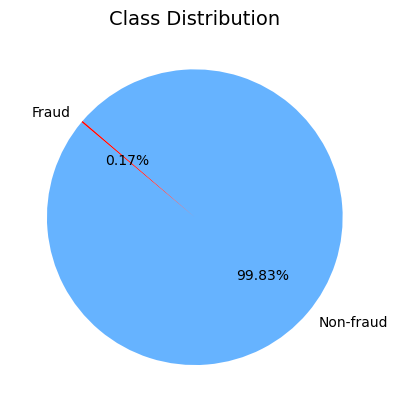

In [28]:
# Calculate the percentages of the classes
fraud_counts = df['Class'].value_counts(normalize=True)

labels = ['Non-fraud', 'Fraud']
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', colors=['#66b3ff', 'red'], startangle=140)
plt.title('Class Distribution', fontsize=14)
plt.show()

## As previously mentioned, the data in the 'Class' column is imbalanced. 
By examining the table, we can clearly see this. According to the analysis, the proportion of Fraud (1) transactions is only 0.17%, which clearly indicates a significant class imbalance in the dataset. Using this imbalanced dataset directly for prediction models and analysis could lead the algorithm to assume that most transactions are not fraudulent, which may increase the risk of overfitting. Therefore, during modeling, this imbalance should be taken into account, and the possibility of applying appropriate techniques to balance the dataset should be considered.

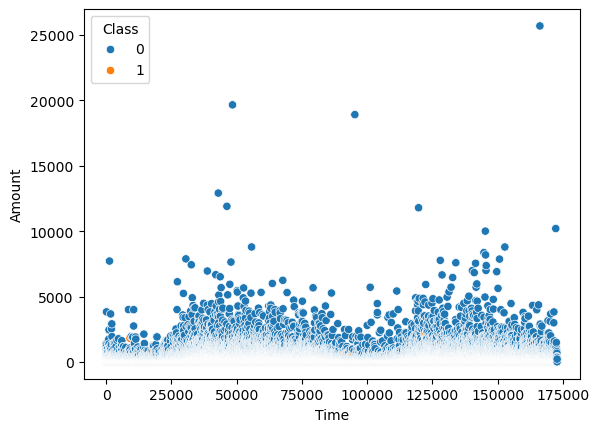

In [31]:
sns.scatterplot(data = df, x = 'Time', y = 'Amount', hue = 'Class') ;

## From the graph, we can observe that non-fraudulent transactions (Class 0) exhibit a very dense distribution over time. 
Most of these transactions seem to concentrate on amounts below 5000. This suggests that typical user behavior generally involves small and regular transaction amounts. However, we also see transactions with higher amounts scattered throughout. Overall, these transactions are consistently spread out and densely populated.

Fraudulent transactions (Class 1) are represented by orange dots in the graph. Fraudulent transactions appear to be quite sparse here. This confirms that fraud cases are much rarer in the dataset (class imbalance).

There are both low and high amounts of fraudulent transactions. However, these high-amount fraudulent transactions are often seen among the blue dots (normal transactions). Fraudulent transactions tend to overlap with other transactions over time, meaning they do not seem to focus on specific time periods. This suggests that fraud can occur at any time of the day, and time might not be a significant distinguishing feature for fraud detection. Therefore, instead of directly using time as a distinguishing factor, we may need to analyze time-based patterns (such as whether there are specific time ranges where fraud is more concentrated).

## Summarry:

In this graph, we notice that fraudulent transactions are quite sparse and scattered. This reinforces the need for data balancing (resampling).
Time and amount alone may not be sufficient to detect fraud. However, when analyzed alongside other features, they could provide valuable insights.

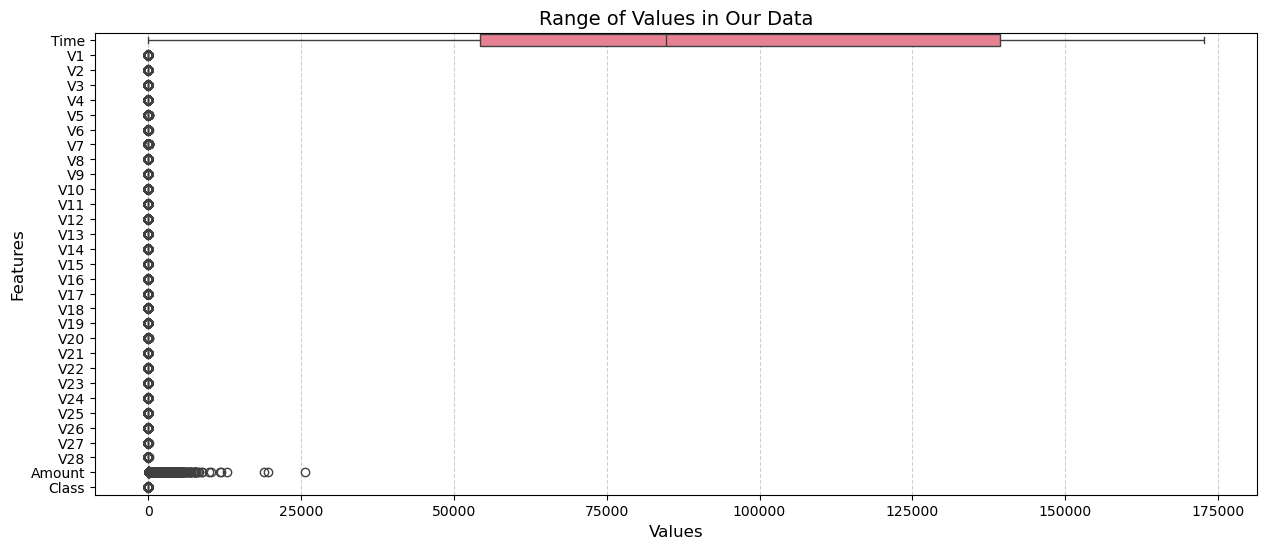

In [34]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, orient="h")
plt.title("Range of Values in Our Data", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## In this chart, which we plotted to examine the general distributions of our columns, we can see that the Time and Amount columns have significantly different value ranges compared to the other features. 
This suggests that in distance-based machine learning algorithms, large value ranges may overshadow the effect of the other columns. To eliminate this effect and ensure that features contribute equally, scaling operations should be applied to these columns.

The Time column has the largest value range, extending up to 175,000, representing the broad diversity in the time dimension.

The Amount column also has a wide range, but other features tend to concentrate within narrower ranges.

All other features are nearly compressed around zero. This indicates that if scaling is not performed, columns like Time and Amount may overshadow other features and potentially affect the analysis results.

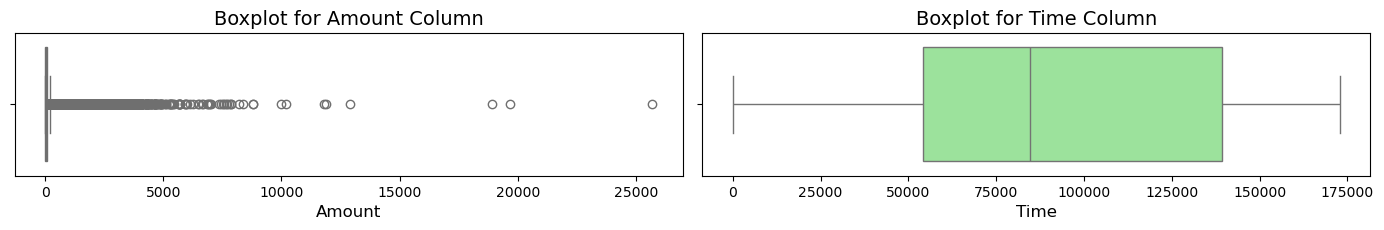

In [36]:
# Boxplot to visualize outliers in the Amount column
plt.figure(figsize=(14, 6))

plt.subplot(3, 2, 1)
sns.boxplot(x=df['Amount'], color='skyblue')
plt.title('Boxplot for Amount Column', fontsize=14)
plt.xlabel('Amount', fontsize=12)

# Boxplot to visualize outliers in the Time column
plt.subplot(3, 2, 2)
sns.boxplot(x=df['Time'], color='lightgreen')
plt.title('Boxplot for Time Column', fontsize=14)
plt.xlabel('Time', fontsize=12)

plt.tight_layout()
plt.show()

## Amount Column:
When we examine the first boxplot, we can observe that the Amount column has a wide range and contains some outliers. These outliers represent rare but very high transaction amounts in the dataset.

Most of the values in the graph are clustered in the lower (left) part of the boxplot, meaning the majority of transaction amounts are relatively small.

The presence of outliers could be an important detail for fraud detection, as fraudsters often perform transactions with unusual amounts. Therefore, instead of removing these outliers, we may consider scaling the data using methods like RobustScaler.



## Time Column:

When we look at the second boxplot, we notice that the Time column has a more uniform distribution. The width of the boxplot indicates that the values in the Time column are spread across a wide range.

The Time column represents the duration (in seconds) since the transaction began. Therefore, there are no extreme values that would be considered outliers. This shows that the Time column is a more balanced feature.

## Examination of Relationships Between Variables Using Graphs

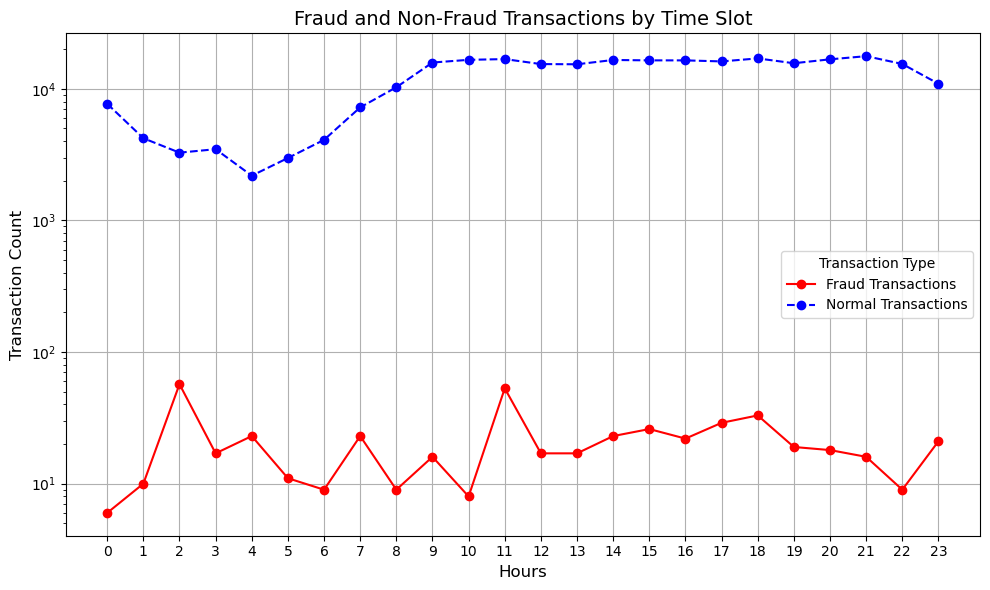

In [44]:
# Convert the 'Time' column to create time slots
hourly_data = df.copy()
hourly_data['Hour'] = pd.to_datetime(hourly_data['Time'], unit='s').dt.hour

# Grouping by time slots for fraud and non-fraud transactions
fraud_data = hourly_data[hourly_data['Class'] == 1].groupby('Hour').size()  # Fraud transactions
non_fraud_data = hourly_data[hourly_data['Class'] == 0].groupby('Hour').size()  # Non-fraud transactions

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_yscale('log')  # Sets the y-axis to a logarithmic scale.

# Plot fraud transactions
ax.plot(fraud_data.index, fraud_data.values, '-o', label='Fraud Transactions', c='red')

# Plot non-fraud transactions
ax.plot(non_fraud_data.index, non_fraud_data.values, '--o', label='Normal Transactions', c='blue')

# Title and labels
ax.set_title('Fraud and Non-Fraud Transactions by Time Slot', fontsize=14)
ax.set_xlabel('Hours', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)

# Grid, legend, and x-axis adjustments
ax.grid(True)
plt.xticks(range(24))  # Display time slots from 0-23
plt.legend(title='Transaction Type')

# Show the plot
plt.tight_layout()
plt.show()

## 
In this graph, fraud and non-fraud transactions are examined based on the number of transactions during different hours of the day. Since the number of non-fraud transactions is significantly higher than fraud transactions, a logarithmic scale has been used to better visualize the data. On a linear scale, the large difference between fraud and non-fraud transactions could make the fraud transactions invisible. The logarithmic scale provides an opportunity to analyze both large and small values more clearly at the same time.

Looking at the details of the graph, it can be seen that non-fraud transactions (blue line) are quite frequent throughout the day. Particularly, from 9:00 AM to 6:00 PM, there is a peak in the number of transactions. This indicates that users tend to make more transactions during working hours. While transactions continue during the night, a decrease in transaction volume is observed compared to other times of the day.

Fraud transactions (red line), on the other hand, occur at much lower frequencies. However, there is a noticeable increase in fraud transactions at certain hours (e.g., midnight, early morning, and lunchtime). This could suggest that fraudsters prefer hours when they are less likely to attract attention. Additionally, the increase around 11:00 AM could indicate that fraudsters attempt to make transactions during times when the systems are more active.

This graph provides valuable insight into the distribution of fraud transactions across different hours of the day, which can be crucial for optimizing security measures. For example, strengthening security systems during hours with high fraud activity or fine-tuning anomaly detection algorithms for specific hours could help prevent such incidents. In the future, an analysis of fraud rates per hour compared to total transactions could be conducted, and anti-fraud mechanisms could be improved using this data.

## Examination of Transaction Amounts

<Axes: xlabel='Log_Amount', ylabel='Density'>

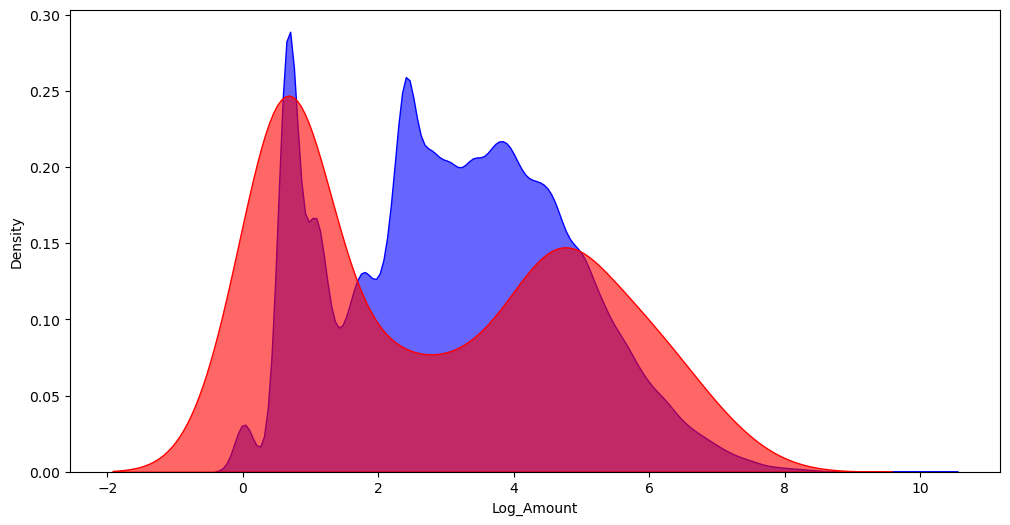

In [47]:
# Convert the data to logarithmic scale (1 is added to avoid 0 values)
df['Log_Amount'] = np.log1p(df['Amount'])  # log1p(x) = log(x + 1)

# Separate fraud and non-fraud transactions
fraud_amount = df[df['Class'] == 1]['Log_Amount']
non_fraud_amount = df[df['Class'] == 0]['Log_Amount']

# Set the figure size
plt.figure(figsize=(12, 6))

# KDE plot for Non-Fraud (Normal Transactions)
sns.kdeplot(non_fraud_amount, fill=True, color="blue", label="Normal Transactions", alpha=0.6)

# KDE plot for Fraud (Fraud Transactions)
sns.kdeplot(fraud_amount, fill=True, color="red", label="Fraud Transactions", alpha=0.6)

##
In this graph, Normal Transactions and Fraud Transactions are compared based on their logarithmic amounts. Normal transactions have a dense distribution between 1 and 5 on the logarithmic scale, while fraud transactions are more concentrated at lower amounts. This may suggest that fraudsters tend to test the systems with lower amounts, attempting to operate without drawing attention.

The graph shows that fraud transactions exhibit high density in the range of 0-2 on the logarithmic scale, while in the range of 3-6, they remain lower compared to normal transactions. Normal transactions, on the other hand, peak at moderate amounts and are distributed across a wider range. This indicates that regular users perform transactions in a variety of amounts, and fraud transactions decrease in this range.

At higher amounts, fraud transactions almost disappear. This suggests that fraudsters tend to avoid performing transactions with large amounts.

From this, it can be concluded that fraud detection systems should pay more attention to low-value transactions, while more specific monitoring methods could be used for medium and high-value transactions.

## Feature Scaling

In [54]:
rob_scaler = RobustScaler()
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Time ve Amount sütunlarını kaldırıyoruz
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Sütun sıralamasını düzenliyoruz
columns_order = ['scaled_time', 'scaled_amount'] + [col for col in df.columns if col not in ['scaled_time', 'scaled_amount']]
df = df[columns_order]

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log_Amount
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


##
Feature scaling aims to make the model's learning process more efficient. When the data is on the same scale, algorithms can learn faster and more accurately. Therefore, we used RobustScaler to make the data in the Amount and Time columns more consistent.

As we observed earlier, the outliers in these columns created a situation that could negatively impact the model's accuracy. RobustScaler scales the data using the median and interquartile range instead of the mean and standard deviation. Therefore, it gives better results when there are data points outside the normal distribution or containing outliers. Its lesser impact on outliers allows us to scale the data without affecting the model's overall accuracy.

As a result, this scaling process optimizes the model's learning by eliminating the impact of outliers, leading to healthier and more reliable results. Additionally, the unique features in the dataset are preserved, which enhances the model's accuracy. If we had removed or manipulated the outliers, the authenticity of these data points would have been compromised, and the model's performance would have decreased. Therefore, we performed the scaling operation appropriately without altering the outliers. This approach increases the model's success rate, enabling more reliable and meaningful predictions.

## Solutions for Imbalanced Data

## 
An imbalanced dataset occurs when there is a significant disparity in the number of examples belonging to different classes. For instance, a model’s accuracy might seem high (e.g., 95%), but if it only predicts the majority class, this indicates that it is ignoring the minority class. In such cases, the model cannot demonstrate its true performance because the minority class is underrepresented.

Solutions to Address the Problem:
Oversampling: Increasing the number of samples in the minority class.
Undersampling: Reducing the number of samples in the majority class.
These techniques help the model learn both classes effectively and make more balanced predictions.

This issue is common in machine learning and requires careful preprocessing to ensure the model performs well in real-world scenarios.








## Visualization of Over Sampling and Under Sampling

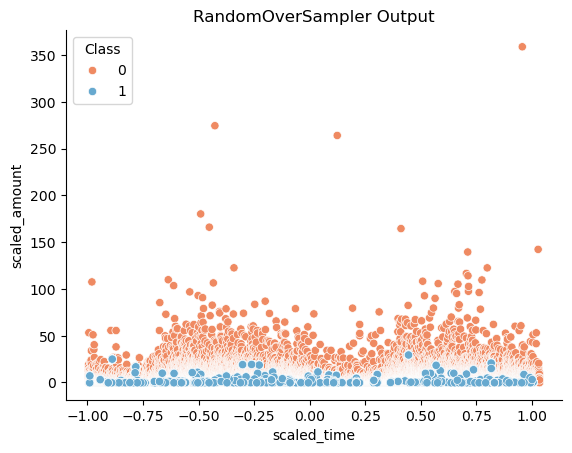

In [60]:
X = df[['scaled_time', 'scaled_amount']]
y = df['Class']

# Data preparation for Oversampling
ros = RandomOverSampler(random_state=45)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Creating DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])  # Features from X
df_resampled['Class'] = y_resampled  # Target class from y

# Creating scatter plot
sns.scatterplot(data=df_resampled, x='scaled_time', y='scaled_amount', hue='Class', palette={0: '#ef8a62', 1: '#67a9cf'})

# Title and visualization
plt.title("RandomOverSampler Output")
sns.despine()
plt.show()


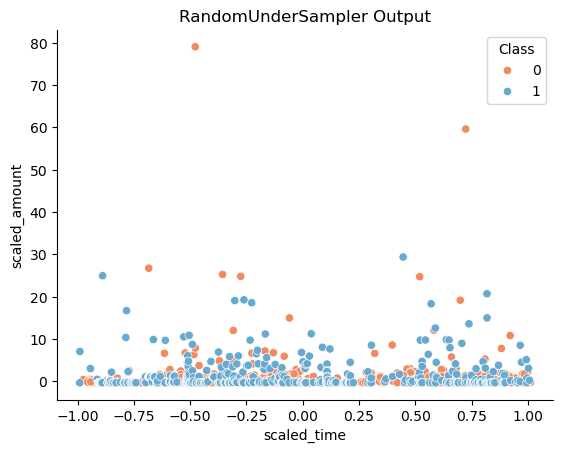

In [61]:
# Data preparation for Undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Creating DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])  # Features from X
df_resampled['Class'] = y_resampled  # Target class from y

# Creating scatter plot
sns.scatterplot(data=df_resampled, x='scaled_time', y='scaled_amount', hue='Class', palette={0: '#ef8a62', 1: '#67a9cf'})

# Title and visualization
plt.title("RandomUnderSampler Output")
sns.despine()
plt.show()

##
In the first graph, the imbalance between classes in the dataset is addressed by increasing the number of rare 'fraud' class samples, balancing the dataset. As a result, both fraud and non-fraud transactions contain an equal number of observations. However, during this duplication process, the fraud class examples are repeated multiple times, which may expose the model to redundant data during training. This can negatively affect the model’s generalization ability, leading to poor performance on new data.

In the second graph, the imbalance in the dataset is addressed by randomly removing excess observations from the 'non-fraud' (normal transactions) class. In this process, the number of 'non-fraud' observations is equalized with the number of 'fraud' class observations, thus balancing the dataset and eliminating the class imbalance.

Which data balancing method is more suitable depends on the magnitude of the imbalance in the dataset and the number of samples in the 'fraud' class. The overall goal here is to improve the model's general accuracy and reduce the effect of imbalanced data.

## Logistic Regression with Imbalanced Data

In [68]:
# Selecting features and target variable
X = df.drop(columns=['Class'])  # All columns except the class to be predicted
y = df['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Logistic Regression model
logistic_model = LogisticRegression(max_iter=6000, solver='saga')
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)

In [71]:
accuracy = logistic_model.score(X_train, y_train)
print(f"Model accuracy score = {accuracy}")

Model accuracy score = 0.9991723681306555


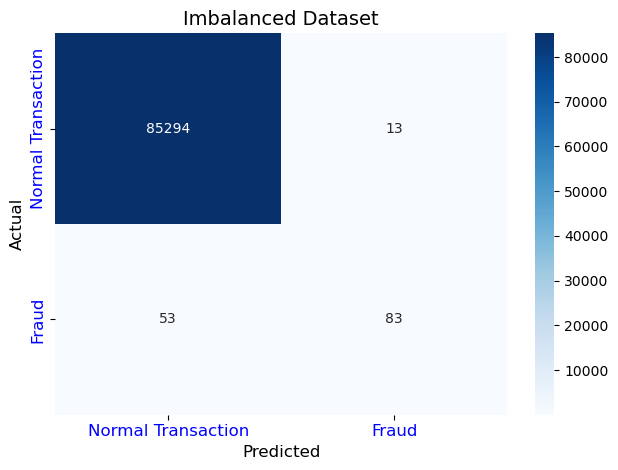

In [74]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    # Labels for the axes
    class_names = ['Normal Transaction', 'Fraud']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

    plt.xticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")

    plt.tight_layout()
    plt.show()

# Drawing the plot
plot_confusion_matrix(y_test, y_pred, "Imbalanced Dataset")

##
For non-fraud transactions, 83,294 (TP) correct and 13 (FP) incorrect predictions were made, totaling 85,307 predictions.
For the fraud class, 53 (FN) incorrect and 83 (TN) correct predictions were made, totaling 136 predictions.

##
We see that the accuracy score of our model is as high as 0.9992, which seems like an excellent result at first glance. However, this is a misleading metric because our dataset is imbalanced. This becomes clearer when we examine the Confusion Matrix.

Even if the model misclassifies fraud transactions, it achieves a high accuracy rate by correctly predicting the majority class, which is the non-fraud transactions. This indicates that the model is successful at predicting the majority class, but struggles to predict the minority class. In summary, our model correctly classifies the non-fraud class with a 99% accuracy rate, but falls short in predicting the fraud class.

Therefore, accuracy alone is not a sufficient metric to evaluate performance in imbalanced datasets. To get a more balanced and meaningful evaluation, metrics such as precision, recall, and f1-score should be used.

In [78]:
logistic_model.score(X_train,y_train)
print("Results of Imbalanced Dataset:")
print(classification_report(y_test, y_pred, target_names=['Non-fraud','Fraud']))

Results of Imbalanced Dataset:
              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     85307
       Fraud       0.86      0.61      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



## Precision measures how accurate the positive predictions made by the model are. In other words, it can be defined as "the percentage of transactions predicted as fraud that are actually fraud".

The model classifies non-fraud transactions with 100% accuracy, while the precision for fraud transactions is 86%. This means that 86% of the transactions predicted as fraud are actually fraud, but the remaining 14% are incorrectly predicted.
Recall measures how well the model detects positive examples. It answers the question, "How many of the actual fraud transactions did we correctly identify?"

The model detects non-fraud transactions with 100% accuracy. However, the recall for fraud transactions is 61%. This indicates that 39% of the fraud transactions were misclassified by the model as "non-fraud." The low recall suggests that the model struggles to detect fraud.
F1-score is a metric that measures the balance between precision and recall. It is used as a more reliable performance metric in imbalanced datasets.

The F1-score for non-fraud transactions is 1.00, indicating that the model performs very well in this class. However, for fraud transactions, the F1-score drops to 0.72. This is due to the lower precision and recall for the fraud class. The model has limited success in detecting fraud.
This analysis shows that while the model classifies non-fraud transactions very well, it struggles to detect fraud transactions. In particular, the low recall for fraud transactions (61%) reveals that the model fails in many cases, leading to a high false negative rate. Therefore, it is necessary to use data balancing techniques to improve model performance and address the imbalanced dataset problem.

## RESAPMLING

##
Resampling is a technique used to make imbalanced datasets more balanced. This process is done by adding new examples to the minority class (oversampling) or removing some examples from the majority class (undersampling). In this way, models are able to learn better for both classes.

Now, we will balance our dataset using resampling methods and examine how these methods affect the performance of our models. In the first stage, we are using Logistic Regression because it is low-cost and easy to implement. This method will give us a quick insight into the effect of our dataset and resampling techniques. Based on the results, we plan to optimize performance by selecting the most suitable machine learning algorithm for our dataset’s needs.

## Logistic Regression with Oversampling

In [84]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

unique, count =np.unique(y_train_smote, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 199008, 1: 199008}

In [86]:
model_smote = LogisticRegression(solver='saga', max_iter=6000, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)


In [88]:
accuracy_smote = model_smote.score(X_train_smote, y_train_smote)
print(f"Model accuracy score = {accuracy_smote}")


Model accuracy score = 0.9470197178002895


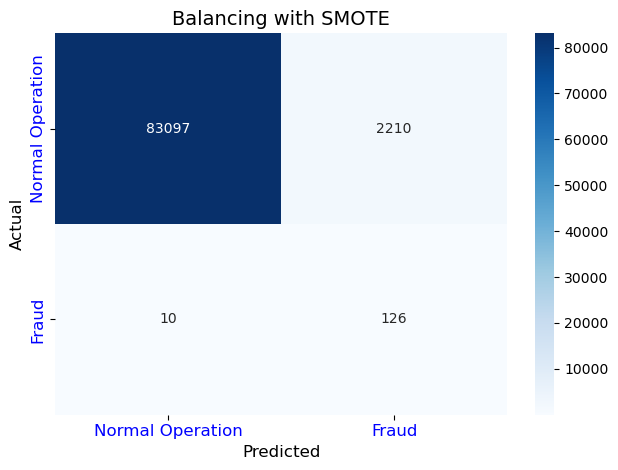

In [90]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    # Labels for the axes
    class_names = ['Normal Operation', 'Fraud']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

    plt.xticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")

    plt.tight_layout()
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_smote, "Balancing with SMOTE")


## 
For non-fraud transactions, 83,097 (TP) correct, 2,210 (FP) incorrect, a total of 85,307 predictions were made.
For the fraud class, 10 (FN) incorrect, 126 (TN) correct, a total of 136 predictions were made.
When working with an imbalanced dataset, the accuracy of our model was very high at 99%. However, this high accuracy is misleading because it was achieved by correctly predicting the majority class, which consists of non-fraud transactions. The minority class, fraud transactions, was not predicted well enough. After balancing the dataset by increasing the minority class using the SMOTE method, the model's accuracy decreased to 94.7%. This drop in accuracy indicates that SMOTE focused on better representing the minority class, and the model started predicting both classes more evenly.

In [97]:
# Performance evaluation
print("Results with SMOTE balancing:")
print(classification_report(y_test, y_pred_smote, target_names=['Normal Operation', 'Fraud']))


Results with SMOTE balancing:
                  precision    recall  f1-score   support

Normal Operation       1.00      0.97      0.99     85307
           Fraud       0.05      0.93      0.10       136

        accuracy                           0.97     85443
       macro avg       0.53      0.95      0.54     85443
    weighted avg       1.00      0.97      0.99     85443



## 
In the model with the balanced dataset using the SMOTE method, the accuracy score is 94.7%, while the accuracy rate obtained from the Confusion Matrix is 97%. This difference is due to the balancing of the training data with SMOTE and the high accuracy of predictions for the majority class in the test data. The high accuracy in the test set can obscure the fact that the fraud class is not being detected well enough. High accuracy can be misleading due to the model's successful predictions on the majority class.

Looking at the Confusion Matrix, we can see that the accuracy rate for normal transactions is around 97%. However, the precision for fraud transactions is only 5%, while the recall is quite high at 93%. This suggests that the model successfully detects most fraud transactions, but the number of false positives is high. In other words, the model is good at detecting fraud transactions in the minority class, but it generates many false alarms.

Thanks to the SMOTE method, the model's ability to catch fraud transactions has increased, but the false positive rate has also risen.

## Logistic Regression with Random Under-Sampling

In [101]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Logistic Regression modeli
model_under = LogisticRegression(solver='saga', max_iter=6000, random_state=42)
model_under.fit(X_train_under, y_train_under)

# Test seti üzerinde tahmin
y_pred_under = model_under.predict(X_test)

In [103]:
accuracy_under = model_under.score(X_train_under, y_train_under)
print(f"Model accuracy score = {accuracy_under}")


Model accuracy score = 0.952247191011236


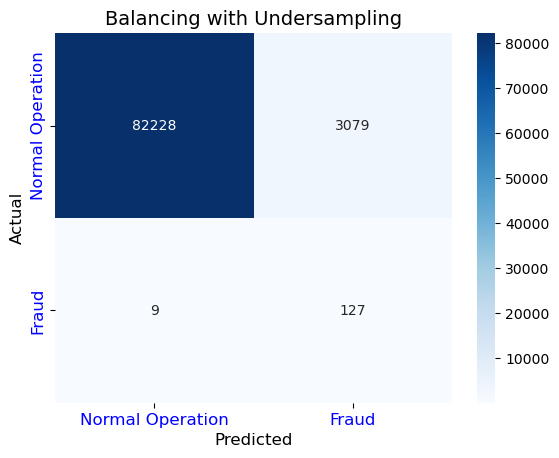

In [105]:
# Confusion Matrix Visualization
matplotlib.rcParams['text.usetex'] = False

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Operation', 'Fraud'], yticklabels=['Normal Operation', 'Fraud'])
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

    plt.xticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")

    plt.show()

plot_confusion_matrix(y_test, y_pred_under, "Balancing with Undersampling")


##
For normal transactions, there were 82,228 (TP) correct predictions and 3,079 (FP) incorrect predictions, with a total of 85,307 predictions made.
For the fraud class, there were 9 (FN) incorrect predictions and 127 (TN) correct predictions, with a total of 136 predictions made.


In [108]:
# Performance evaluation
print("Results with Undersampling balancing:")
print(classification_report(y_test, y_pred_under))


Results with Undersampling balancing:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



##
When the undersampling method is used, the recall value for the fraud class remains around 93%, indicating that the model is effective at capturing the minority class. However, the precision value is only 4%, which suggests that the model makes a significant number of false positive predictions for fraud transactions. In other words, while the model detects fraud transactions correctly, it raises many false alarms.

Undersampling has helped better represent the minority class by reducing the examples of the majority class, thus improving the performance on fraud transactions. However, this method may negatively impact the overall accuracy of the model, as it reduces the total size of the dataset. The decrease in the training set size can limit the model’s ability to generalize, meaning that although it becomes more successful at detecting the minority class, the overall accuracy for the majority class drops.

## Method Selection

## 
In fraud detection studies, selecting the right method is crucial depending on our objective. If our goal is to not miss any fraud cases, the recall value should be prioritized. Particularly in industries like banking and insurance, where preventing large financial losses due to fraud is critical, false alarms can be tolerated. In this case, only false alarms that require further investigation can be considered a cost for methods aiming to detect fraud cases at the highest level.

In imbalanced datasets, the model often classifies fraudulent transactions as normal, i.e., it makes False Negative (FN) errors. Recall is used to minimize these errors, making it one of the most important metrics for capturing fraudulent transactions. Recall is calculated as:

Recall = (TP) / (TP + FN)

Due to data imbalance, accuracy and precision do not always provide correct results. Accuracy can be misleading since it is often dominated by normal transactions, and precision can be reduced due to False Positive (FP) errors. Therefore, increasing recall is more important for catching fraudulent transactions.

On the other hand, if our priority is to minimize false alarms, we should focus on improving the precision value. This is particularly important in industries like e-commerce, where customer satisfaction is critical. False alarms can lead to customer loss and negative experiences, so in this scenario, more sensitive models and techniques like feature engineering and threshold optimization can be applied.

In some cases, the goal may be to both detect fraud and reduce false alarms. For these situations, focusing on metrics like F1-Score, which balances recall and precision, may be more appropriate. This balance plays a critical role, especially in large-scale insurance operations.

In our project, since preventing fraud cases is our priority, the recall value stands out as the most important metric.

We observe that recall values are around 93% for both models. Therefore, it can be said that a model showing more balanced performance, focusing on precision and F1-Score, should be preferred. Since the F1-Score value is higher in the SMOTE method, it provides more balanced performance on fraud transactions. In this case, the SMOTE-based model, which detects fraud more balanced and minimizes false positives, can be preferred.

## Model Training

## Random Forest:

In [115]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]


Accuracy Score: 0.9995903701883126
Confusion Matrix:
 [[85288    19]
 [   16   120]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.88      0.87       136

    accuracy                           1.00     85443
   macro avg       0.93      0.94      0.94     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9780806812626232


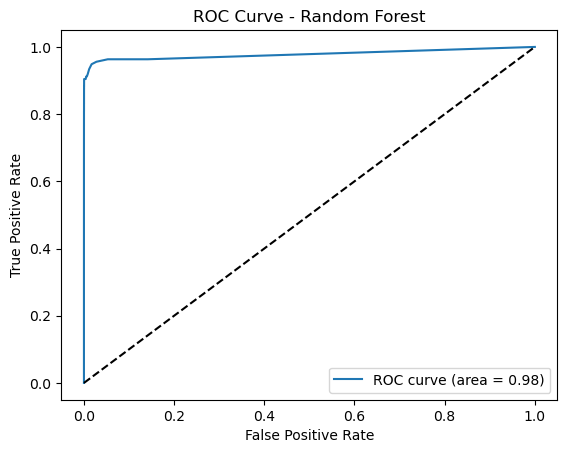

In [117]:
# Confusion Matrix and Classification Report
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC-AUC Score
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC-AUC Score:", auc_rf)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label="ROC curve (area = %0.2f)" % auc_rf)
plt.plot([0, 1], [0, 1], "k--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

##
The results obtained by training the model with the Random Forest algorithm show that our model is quite successful in fraud detection.

Looking at the ROC-AUC score, we can see that the model’s overall separation performance is very good. ROC-AUC measures the distinction between classes, and we can say that this model has a strong ability to detect fraud. Our model demonstrates balanced performance in fraud detection and has achieved good success, particularly in capturing fraud cases.

Despite the imbalanced data structure in the test set, we managed to achieve effective results in distinguishing both fraud and non-fraud transactions. However, there is still a slight error rate in the fraud class (Class 1) with a Recall of 0.88. This suggests that some fraud transactions might be overlooked. This indicates that further improvements may be needed to obtain a more sensitive model.



## SVM

In [ ]:

# Scaling the data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train)
X_test_smote = scaler.transform(X_test)

# Define and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm_model.fit(X_train_smote, y_train)

y_pred = svm_model.predict(X_test_smote)
y_pred_proba = svm_model.predict_proba(X_test_smote)[:, 1]

# Performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 
The results obtained with the SVM model show a high success rate in fraud detection. However, we can still say that it falls short in many areas compared to our Random Forest model.

Looking at the ROC-AUC score, we see that the model's score has dropped to 0.96. This indicates that the model is quite successful in distinguishing between classes, but Random Forest generally appears to be stronger in fraud detection.

Although the accuracy rate of the SVM model is high, its recall value of 0.68 is particularly noteworthy. This shows that the model is able to correctly capture the fraud class (68%). However, compared to the Random Forest model's recall value of 0.88, we can say that the SVM model detects fraud transactions at a slightly lower rate. This suggests that the risk of overlooking some fraud transactions is higher with the SVM model.

While the SVM model is quite successful in fraud detection, we can say that the Random Forest model is more successful in distinguishing between classes and detecting fraud with higher accuracy.



##  KNN (K-Nearest Neighbors)

In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')  # 'auto', 'ball_tree', 'kd_tree', 'brute' options
knn.fit(X_train_smote, y_train_smote)

# Prediction with test data
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

# ROC Curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label="ROC curve (area = %0.2f)" % auc_knn, color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()

##  
The results obtained with the KNN (K-Nearest Neighbors) model show high accuracy in fraud detection, but there are significant differences between the classes. However, upon further analysis, we observe some noteworthy points.

Looking at the Confusion Matrix, we can see that the model is extremely successful at correctly distinguishing normal transactions (Class 0), making only 177 false positive predictions. However, the model only detected 122 fraud transactions (Class 1) correctly and made 14 false negative predictions. This shows that the model has a high recall (0.90), but it produces a significant number of false positives.

The precision value has dropped to 0.41, meaning that only 41% of the transactions classified as fraud are actually correct. This indicates that the model is prone to false positives, and most of the transactions labeled as fraud may not actually be fraudulent. This shows that the model's accuracy in detecting fraud is low. Additionally, the F1-Score is 0.56, which suggests that the model's overall performance in fraud detection is unsatisfactory, especially considering the high number of false positives.

The ROC-AUC score of 0.95 shows that the model is quite good at distinguishing between classes, but it still falls behind Random Forest (0.98) and SVM (0.96) models.

In conclusion, while the KNN model performs quite well in terms of overall accuracy, it falls short in precision and F1-score. Although the model has a high rate of detecting fraud transactions, the high false positive rate significantly reduces the model’s reliability.

## Conclusion:

##
As a result of our analysis, we determined that the most suitable model is Random Forest. However, we can still say that it is not good enough in predicting frauds.

When evaluating this situation, it is important to point out the severe class imbalance in the dataset. The number of normal transactions is significantly higher than the transactions containing fraud. This imbalance might negatively affect the model's performance in distinguishing frauds. Overall, while our model performs well, it seems to struggle in detecting fraudulent transactions.